<img src="./assets/img.png" width="900px"  height="200px" />

## Import all the libraries

In [3]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay, classification_report

In [4]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

## Load the dataset

In [6]:
df = pd.read_csv(r"data/bank_data.csv")
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.shape

(10127, 22)

## Check for missing values

In [8]:
df.isnull().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Retrieve all the categorical and numerical columns name

In [ ]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

quant_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt',
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

## Creating a new column called Churn and apply If the value is "Existing Customer", assign 0 to the new 'Churn' column

In [18]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

In [19]:
df[['Attrition_Flag', 'Churn']]

,Attrition_Flag,Churn
0,Existing Customer,0
1,Existing Customer,0
2,Existing Customer,0
3,Existing Customer,0
4,Existing Customer,0
...,...,...
10122,Existing Customer,0
10123,Attrited Customer,1
10124,Attrited Customer,1
10125,Attrited Customer,1


## Let plot some distributions

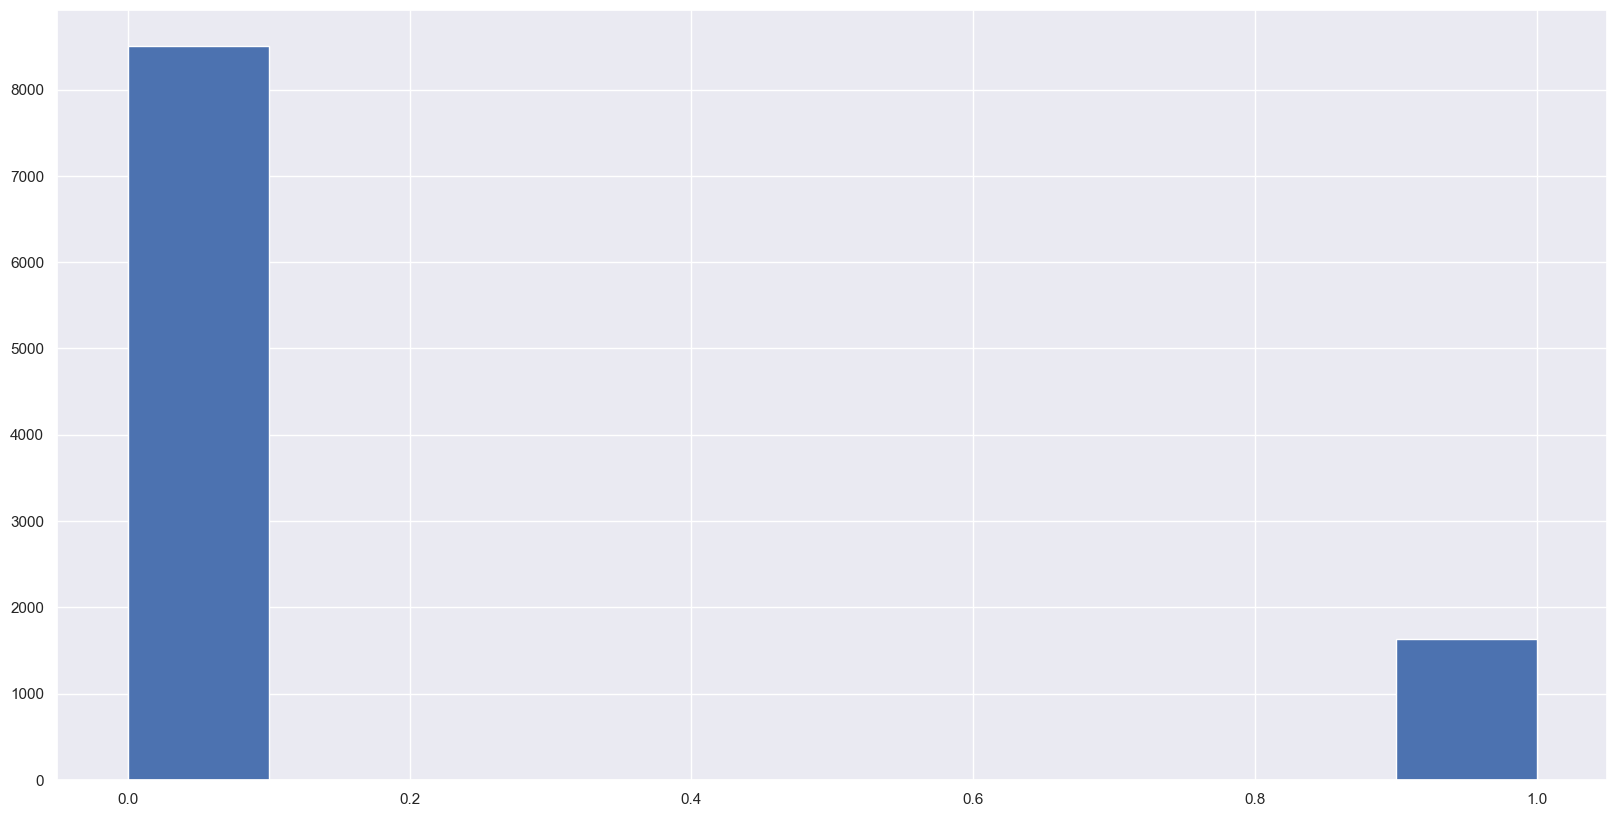

In [20]:
plt.figure(figsize=(20,10))
df['Churn'].hist()
plt.title('Distribution of Customer Churn', fontsize=18)
plt.xlabel('Churn (0=Stayed, 1=Churned)', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)
plt.xticks([0, 1], ['Stayed (0)', 'Churned (1)'], fontsize=12)
plt.grid(False)
plt.show()

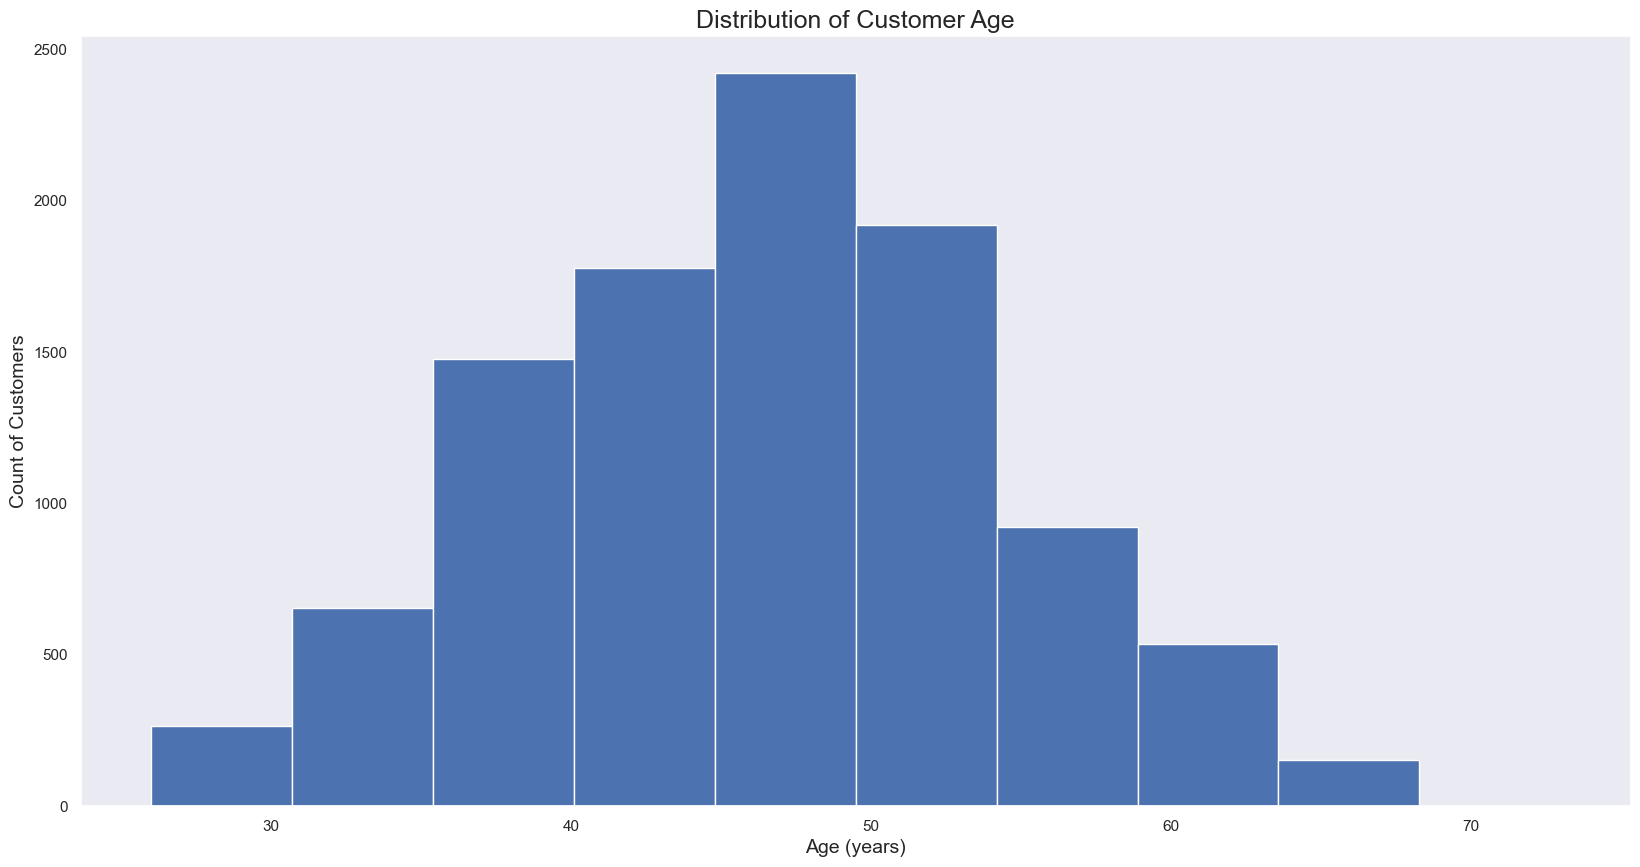

In [23]:
plt.figure(figsize=(20,10)) 
df['Customer_Age'].hist()
plt.title('Distribution of Customer Age', fontsize=18)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)
plt.grid(False)  # Optional: removes grid lines for cleaner look
plt.show()

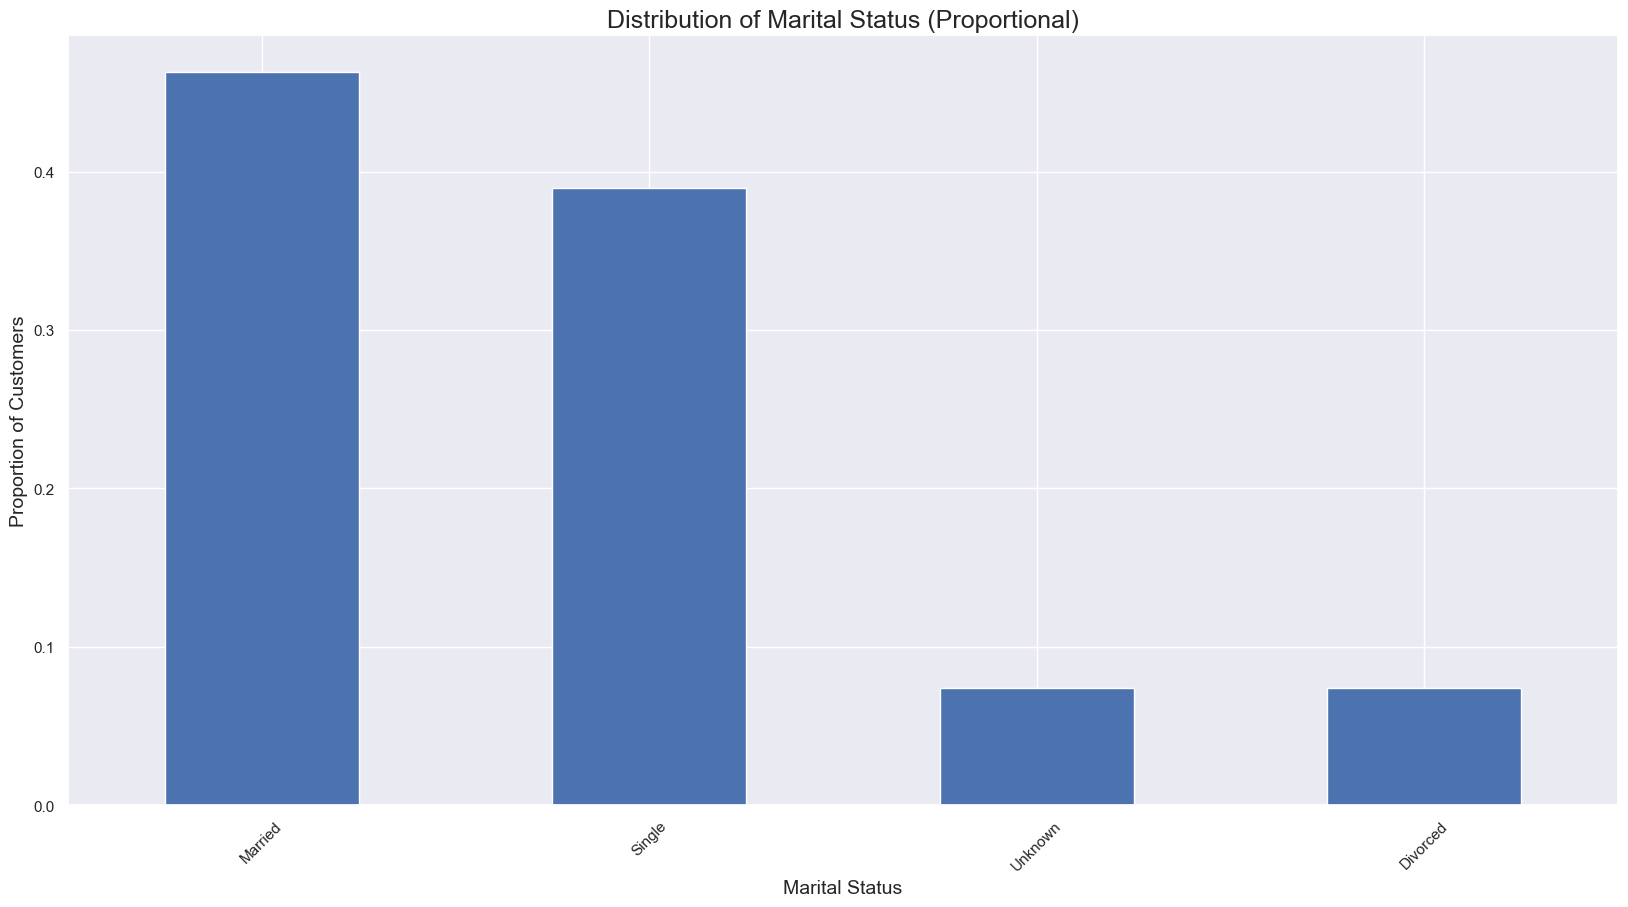

In [24]:
plt.figure(figsize=(20,10)) 
df.Marital_Status.value_counts('normalize').plot(kind='bar')
plt.title('Distribution of Marital Status (Proportional)', fontsize=18)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Proportion of Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotates category labels for better readability
plt.show()

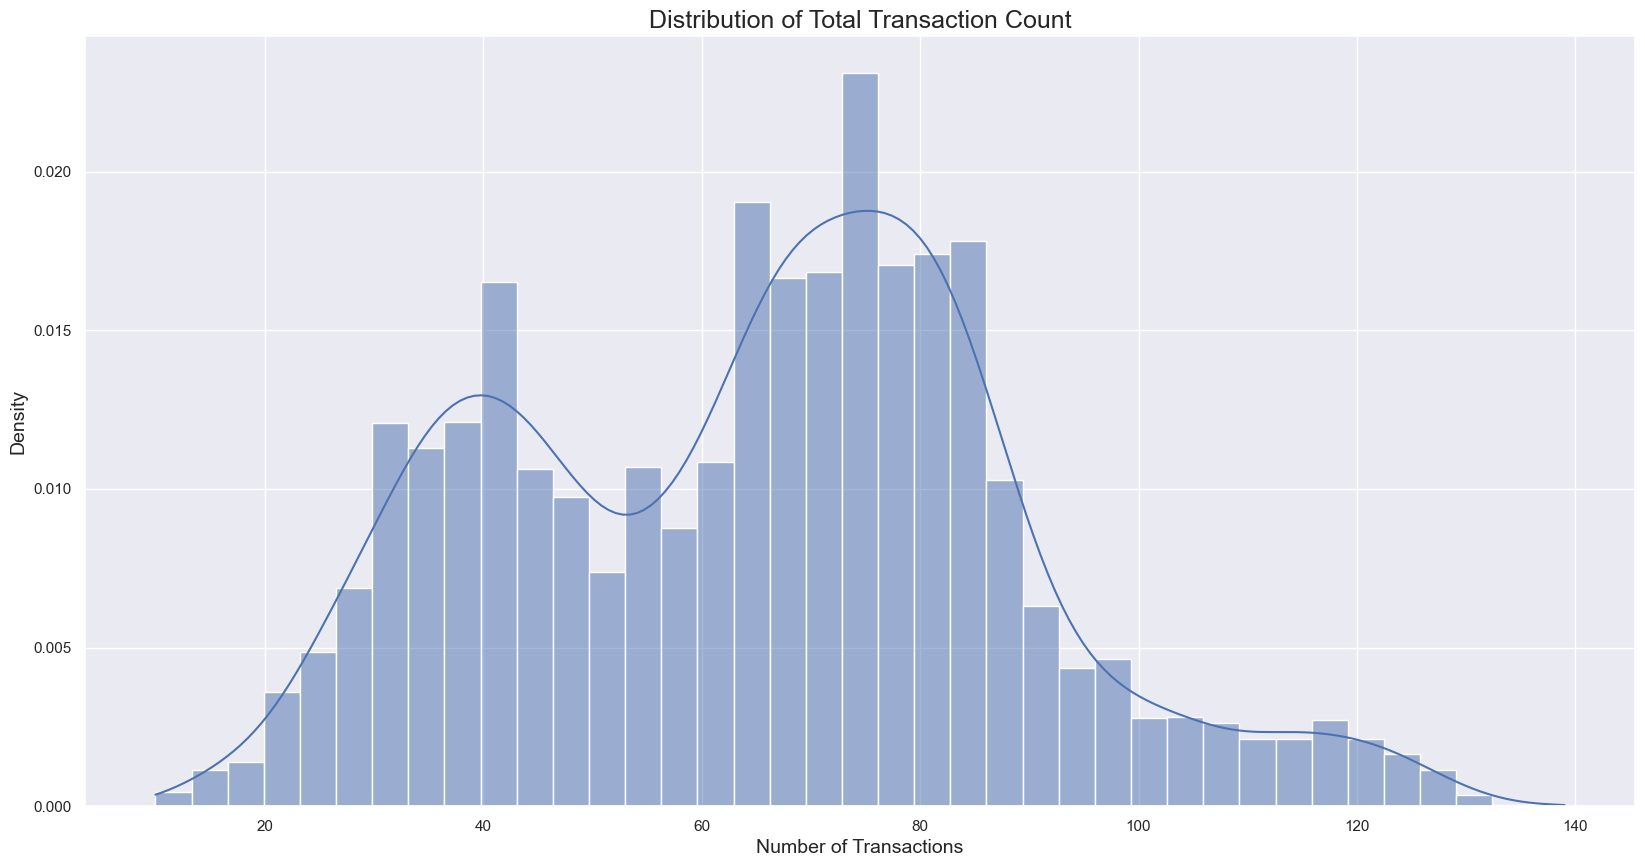

In [33]:
plt.figure(figsize=(20,10))
# Show distributions of 'Total_Trans_Ct' and add a smooth curve obtained using a kernel density estimate
sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True)
plt.title('Distribution of Total Transaction Count', fontsize=18)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

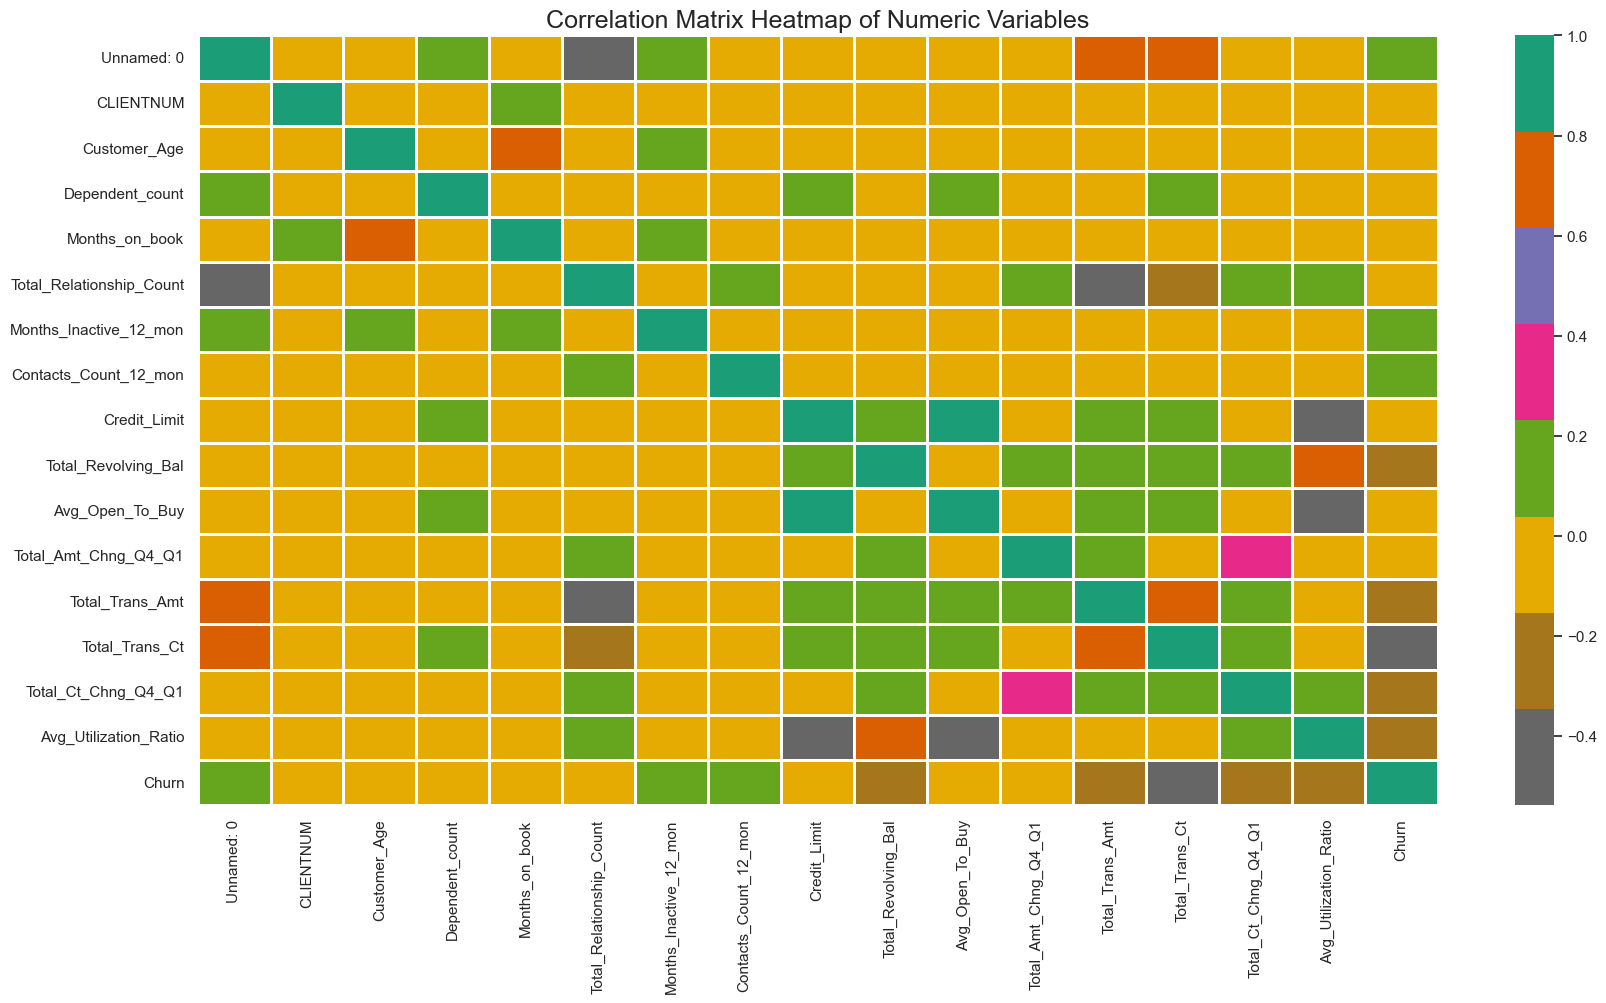

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='Dark2_r', linewidths=2)
plt.title('Correlation Matrix Heatmap of Numeric Variables', fontsize=18)
plt.show()

## Preparing the data such as feature X and target y

In [35]:
y = df['Churn'] # target

In [36]:
X = pd.DataFrame() # Features

## Feature Engineering through mean or target encoding

In [43]:
# gender encoded column
# Feature engineering using mean encoding (target encoding)
# This technique replaces categorical variables with the mean churn rate for each category
# This creates numeric features that capture the relationship between categories and the target variable

# Gender encoding: Replace each gender category with the average churn rate for that gender
gender_lst = []
gender_groups = df.groupby('Gender')['Churn'].mean()  # Calculate mean churn rate per gender
# We select ['Churn'] column first, then calculate mean to avoid errors with non-numeric columns

for val in df['Gender']:
   gender_lst.append(gender_groups.loc[val])  # Look up the mean churn rate for each customer's gender

df['Gender_Churn'] = gender_lst  # Add as a new feature column

# Education level encoding: Replace each education level with its average churn rate
edu_lst = []
edu_groups = df.groupby('Education_Level')['Churn'].mean()  # Calculate mean churn rate per education level

for val in df['Education_Level']:
   edu_lst.append(edu_groups.loc[val])  # Look up the mean churn rate for each customer's education level

df['Education_Level_Churn'] = edu_lst  # Add as a new feature column

# Marital status encoding: Replace each marital status with its average churn rate
marital_lst = []
marital_groups = df.groupby('Marital_Status')['Churn'].mean()  # Calculate mean churn rate per marital status

for val in df['Marital_Status']:
   marital_lst.append(marital_groups.loc[val])  # Look up the mean churn rate for each customer's marital status

df['Marital_Status_Churn'] = marital_lst  # Add as a new feature column

# Income category encoding: Replace each income category with its average churn rate
income_lst = []
income_groups = df.groupby('Income_Category')['Churn'].mean()  # Calculate mean churn rate per income category

for val in df['Income_Category']:
   income_lst.append(income_groups.loc[val])  # Look up the mean churn rate for each customer's income category

df['Income_Category_Churn'] = income_lst  # Add as a new feature column

# Card category encoding: Replace each card category with its average churn rate
card_lst = []
card_groups = df.groupby('Card_Category')['Churn'].mean()  # Calculate mean churn rate per card category

for val in df['Card_Category']:
   card_lst.append(card_groups.loc[val])  # Look up the mean churn rate for each customer's card category

df['Card_Category_Churn'] = card_lst  # Add as a new feature column


In [44]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
             'Income_Category_Churn', 'Card_Category_Churn']

X[keep_cols] = df[keep_cols]

In [45]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


## Split the data to train and test set

In [56]:
# This cell may take up to 15-20 minutes to run
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

## Scale the features

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training a LogisticRegression and RandomForestClassifier model

In [87]:
# grid search
rfc = RandomForestClassifier(random_state=42)
# Use a different solver if the default 'lbfgs' fails to converge
# Reference: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lrc = LogisticRegression(solver='liblinear', max_iter=3000)

# Define parameter grid for Random Forest
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 100],
    'criterion' :['gini', 'entropy']
}

# Perform grid search for Random Forest (on unscaled data)
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

lrc.fit(X_train_scaled, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

y_train_preds_lr = lrc.predict(X_train_scaled)
y_test_preds_lr = lrc.predict(X_test_scaled)

In [ ]:
# scores
print('Random Forest Results')
print('Test Results')
print(classification_report(y_test, y_test_preds_rf))
print('Train Results')
print(classification_report(y_train, y_train_preds_rf))

print('Logistic Regression Results')
print('Test Results')
print(classification_report(y_test, y_test_preds_lr))
print('Train Results')
print(classification_report(y_train, y_train_preds_lr))

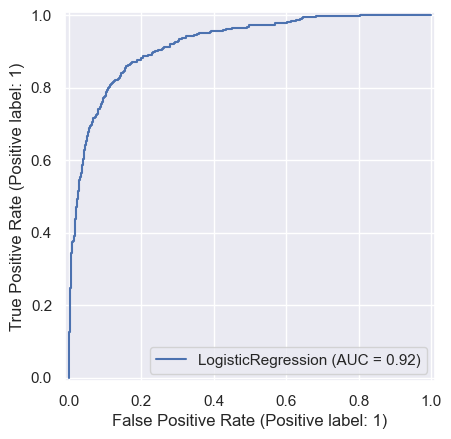

In [61]:
# ROC Curve
lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test_scaled, y_test)

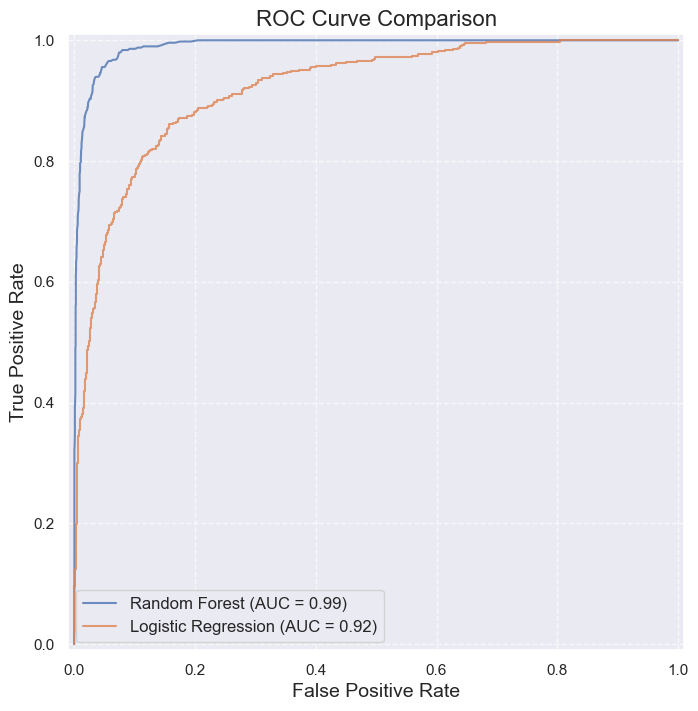

In [65]:
# plots
plt.figure(figsize=(15, 8))
ax = plt.gca()

# First plot the Random Forest ROC curve
rfc_disp = RocCurveDisplay.from_estimator(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8, name='Random Forest')

# Then plot the Logistic Regression ROC curve using scaled data
lrc_disp = RocCurveDisplay.from_estimator(lrc, X_test_scaled, y_test, ax=ax, alpha=0.8, name='Logistic Regression')

# Add labels and title
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


In [66]:
# save best model
joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
joblib.dump(lrc, './models/logistic_model.pkl')

['./models/logistic_model.pkl']

In [67]:
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')

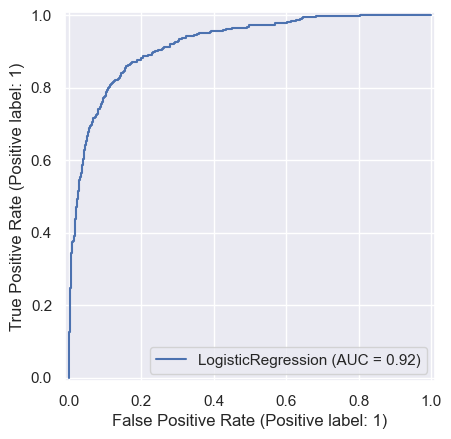

In [68]:
lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test_scaled, y_test)

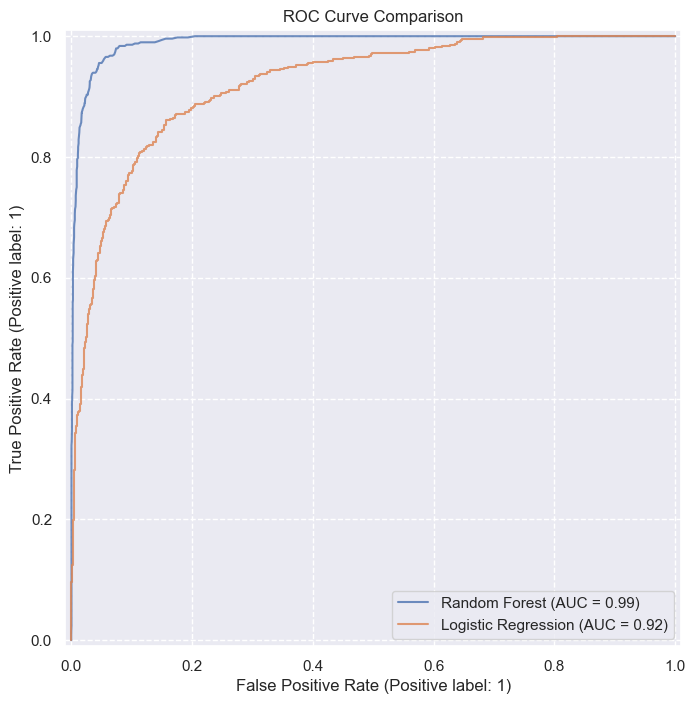

In [69]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8, name='Random Forest')
lrc_disp = RocCurveDisplay.from_estimator(lrc, X_test_scaled, y_test, ax=ax, alpha=0.8, name='Logistic Regression')
plt.title('ROC Curve Comparison')
plt.grid(linestyle='--')
plt.show()

<Figure size 640x480 with 0 Axes>

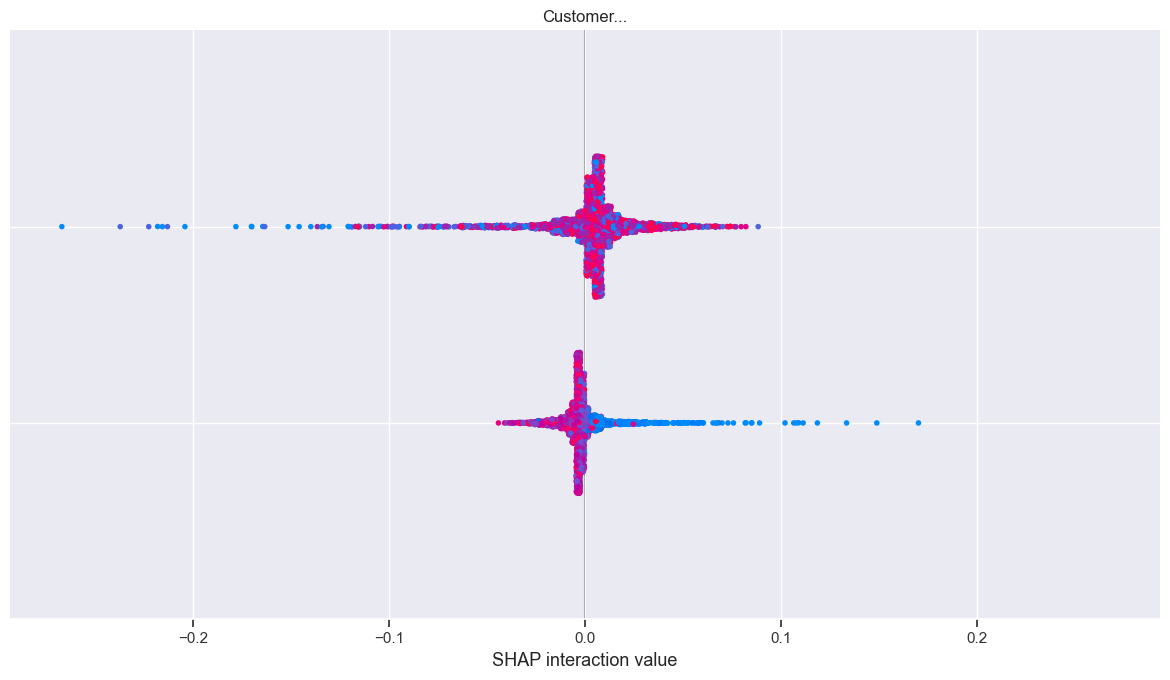

In [70]:
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

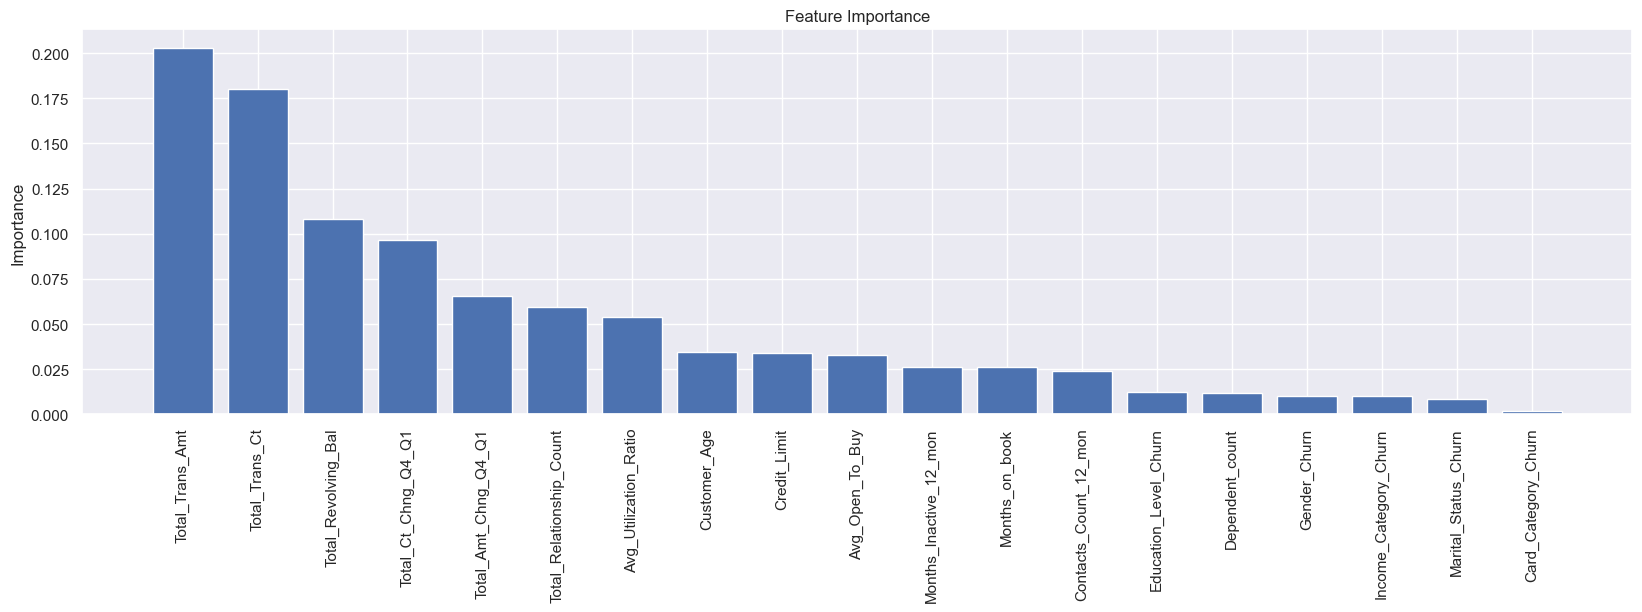

In [71]:
# Calculate feature importances
importances = cv_rfc.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,5))

# Create plot title
plt.title("Feature Importance")
plt.ylabel('Importance')

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90);

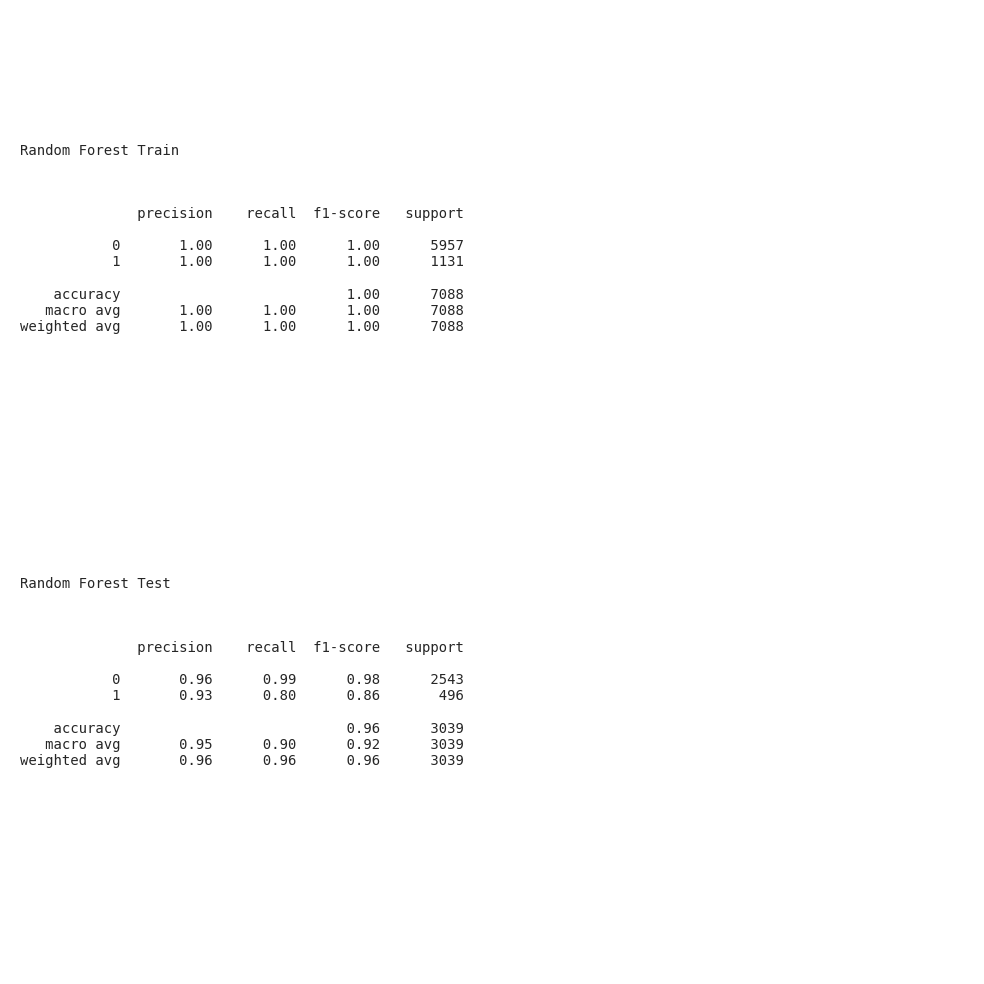

In [90]:
plt.figure(figsize=(10, 10))  # Increase figure size for readability
plt.text(0.01, 0.85, str('Random Forest Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.65, str(classification_report(y_train, y_train_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.40, str('Random Forest Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.20, str(classification_report(y_test, y_test_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('./images/results/rf_results.png')
plt.show()

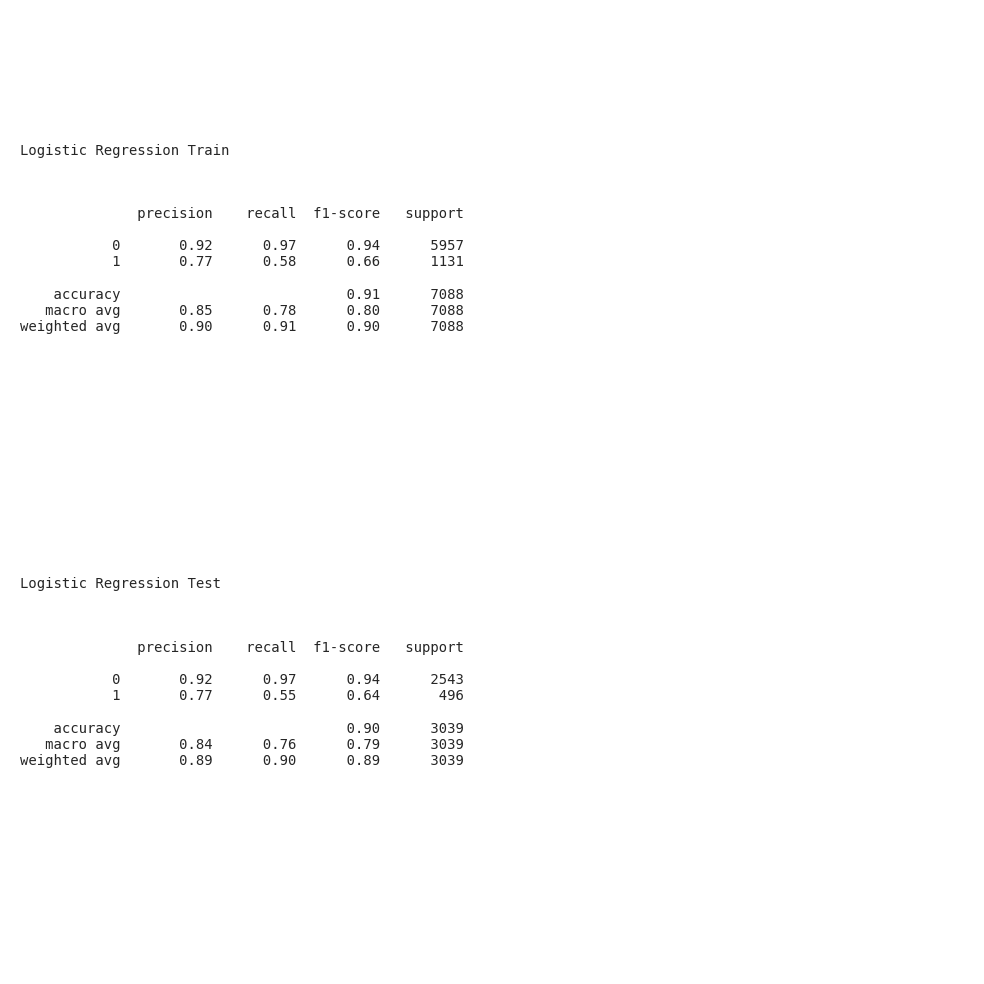

In [91]:
plt.figure(figsize=(10, 10))  # Increase figure size for readability
plt.text(0.01, 0.85, str('Logistic Regression Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.65, str(classification_report(y_train, y_train_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.40, str('Logistic Regression Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.20, str(classification_report(y_test, y_test_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('./images/results/lr_results.png')
plt.show()